In [1]:
from sklearn.cluster import KMeans
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
classes = [dir for dir in os.listdir("test")]
classes.sort()

data = []
labels = []
for i, dir in enumerate(classes):
    for fname in os.listdir(os.path.join("test", dir)):
        data.append(np.load(os.path.join("test", dir, fname)))
        labels.append(i)

data = np.vstack(data)
labels = np.array(labels)
kmeans = KMeans(n_clusters=len(classes), random_state=0, n_init="auto").fit(data)

{'1080Lines': 4, '1400Ripples': 4, 'Air_Compressor': 16, 'Blip': 19, 'Blip_Low_Frequency': 3, 'Chirp': 19, 'Extremely_Loud': 21, 'Fast_Scattering': 11, 'Helix': 3, 'Koi_Fish': 13, 'Light_Modulation': 13, 'Low_Frequency_Burst': 22, 'Low_Frequency_Lines': 9, 'No_Glitch': 6, 'Paired_Doves': 1, 'Power_Line': 7, 'Repeating_Blips': 19, 'Scattered_Light': 2, 'Scratchy': 8, 'Tomte': 3, 'Violin_Mode': 14, 'Wandering_Line': 4, 'Whistle': 15}


/tmp/ipykernel_24787/691070974.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



AttributeError: 'list' object has no attribute 'shape'

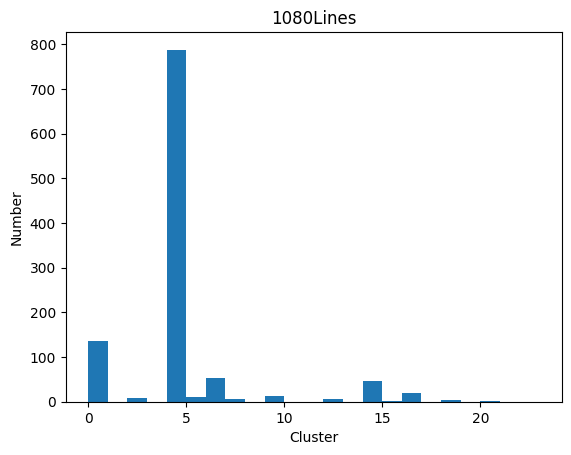

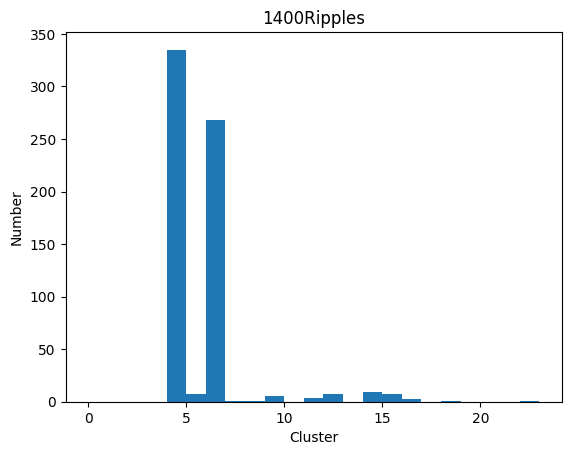

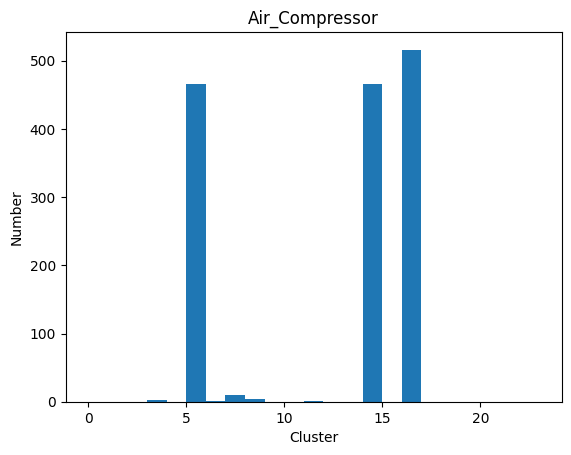

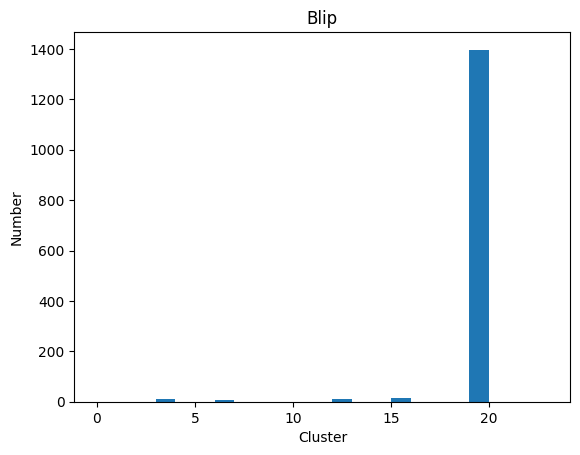

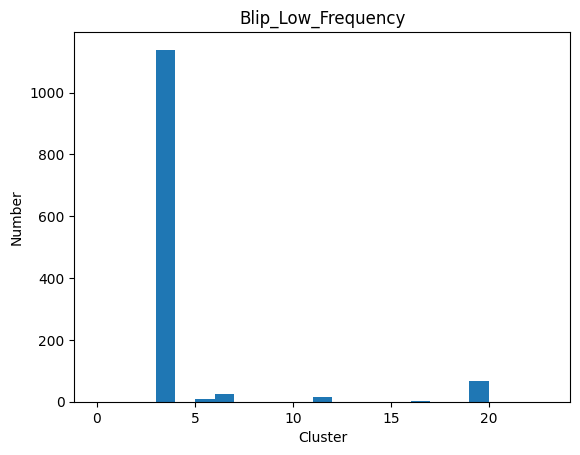

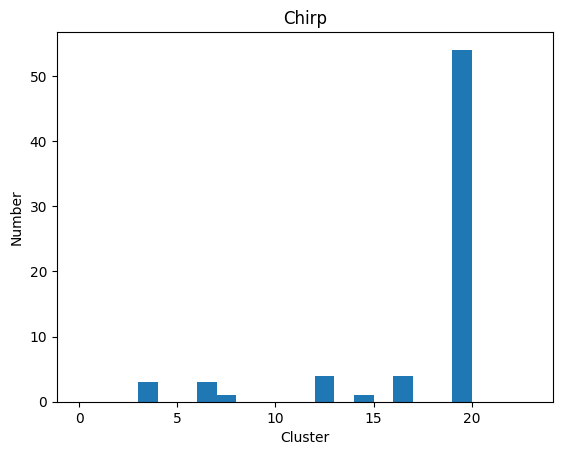

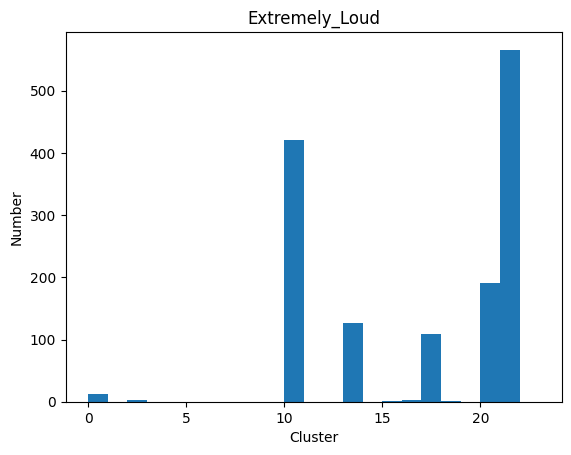

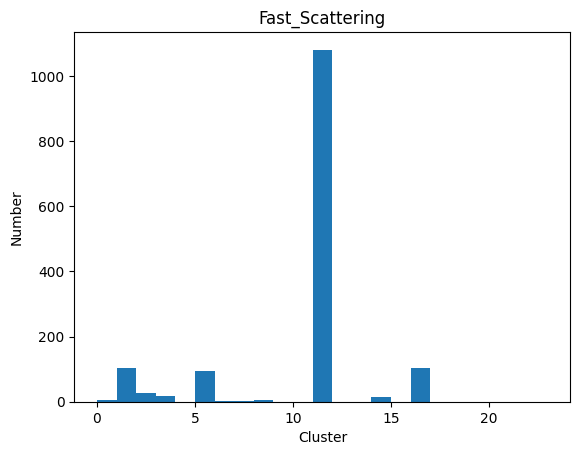

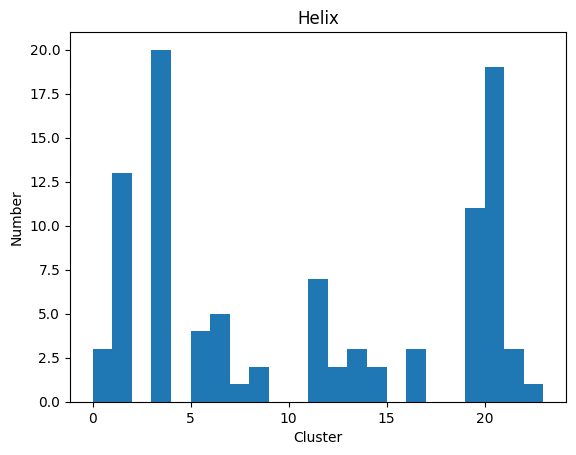

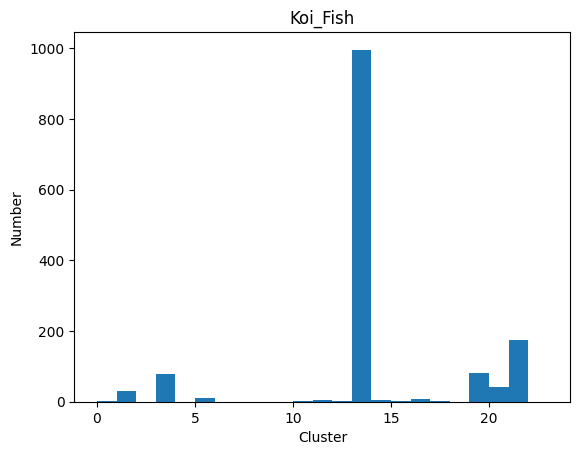

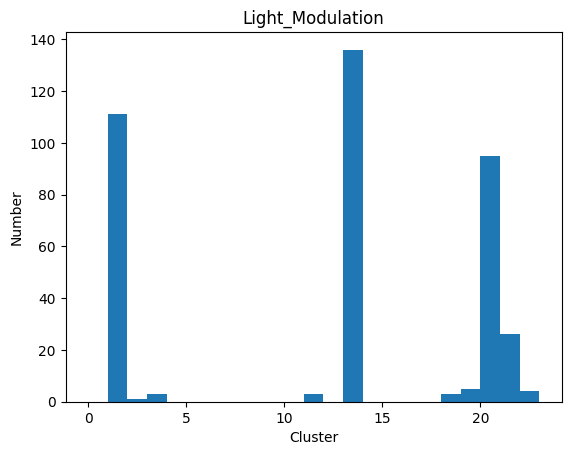

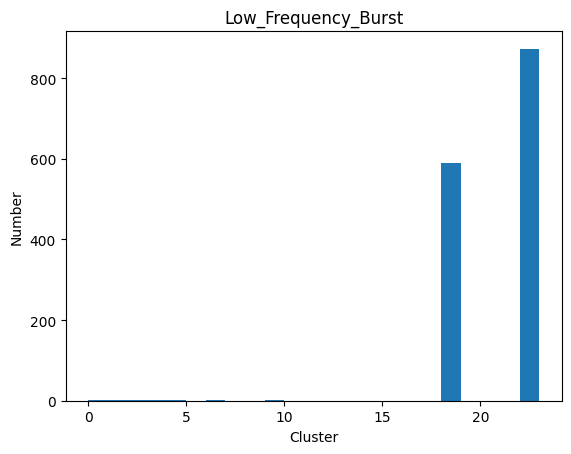

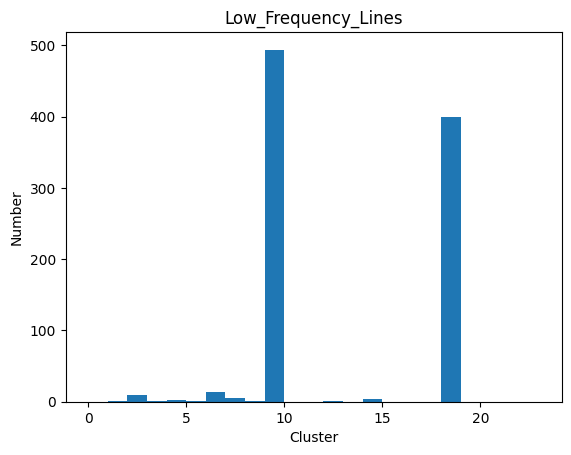

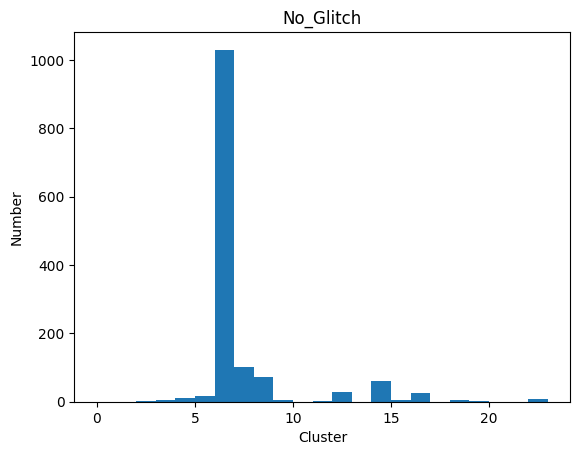

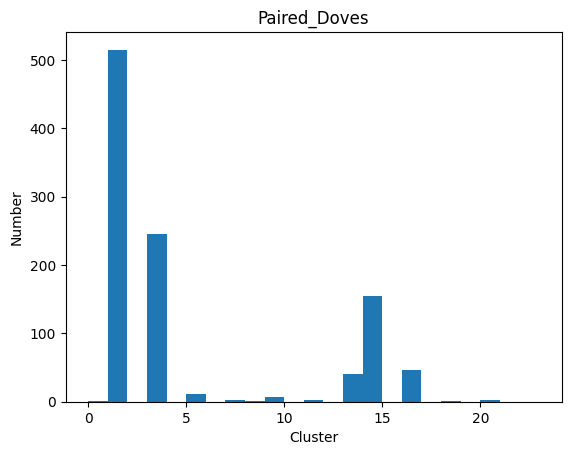

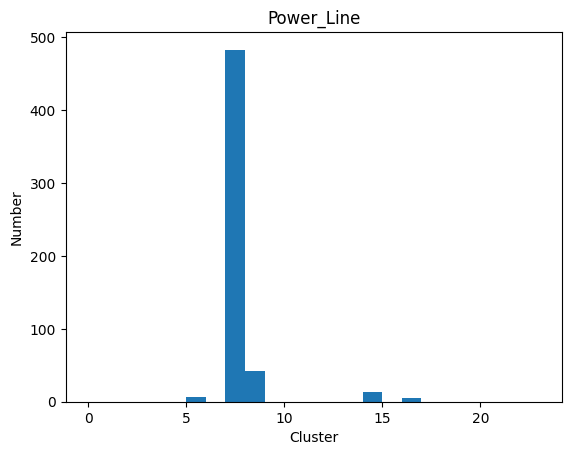

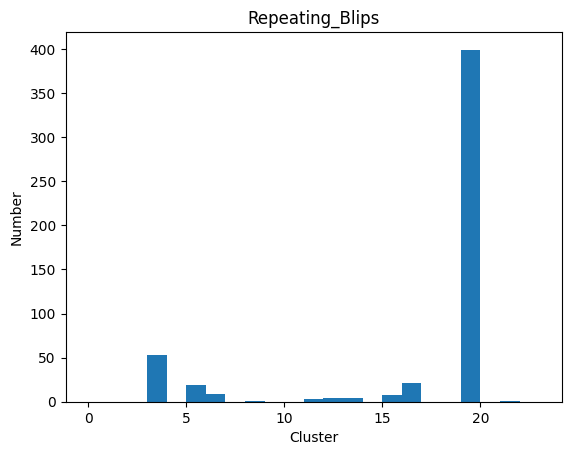

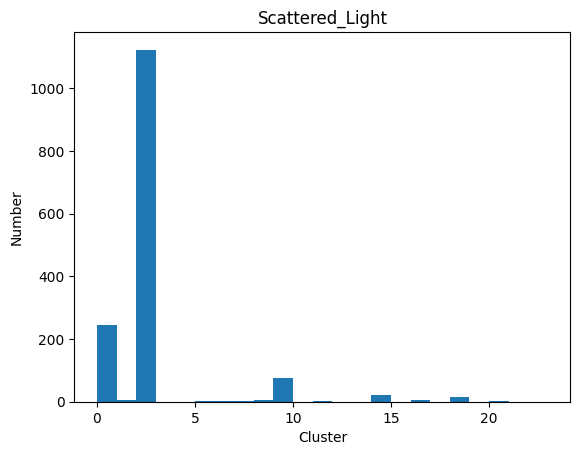

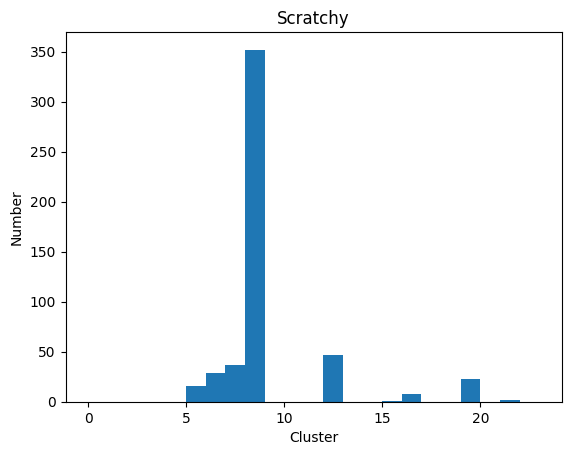

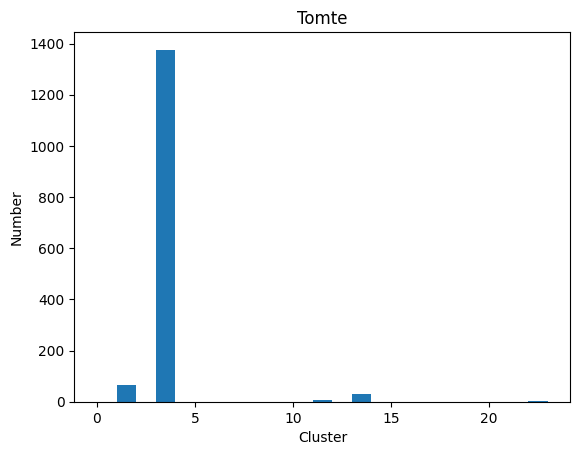

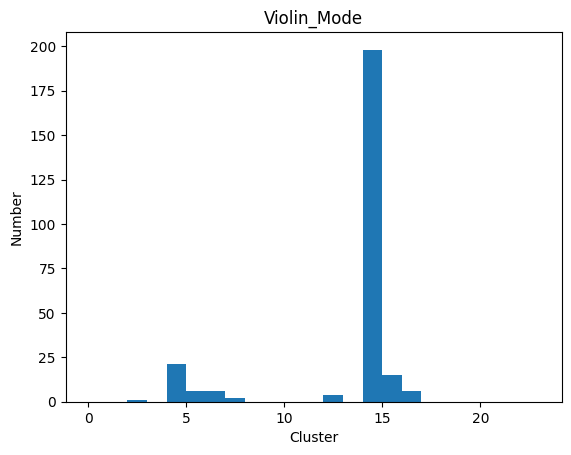

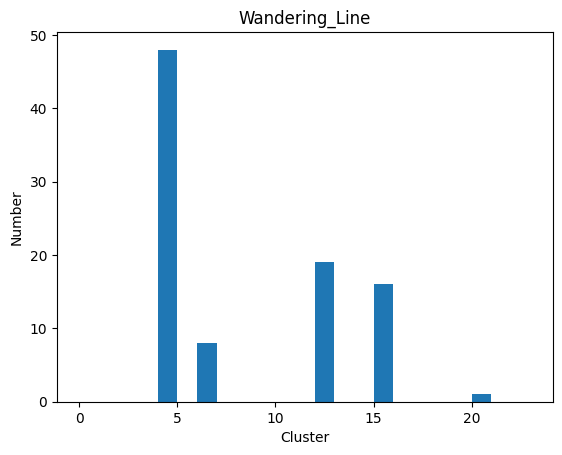

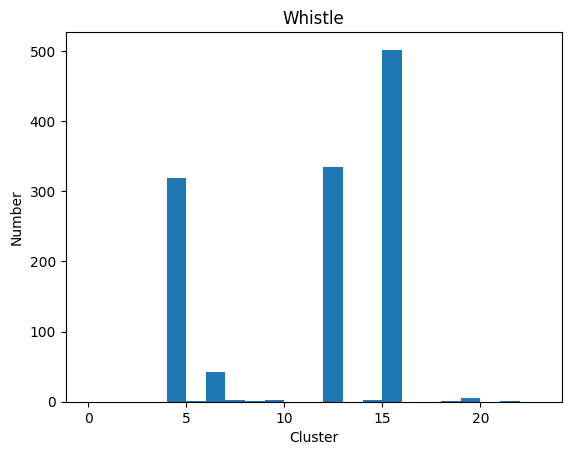

In [17]:
mis = []
total_mis = 0
cluster_map = {}
for i in range(len(classes)):
    mask = (labels == i)
    cluster = kmeans.labels_[mask]
    cluster_map[classes[i]] = np.argmax(np.bincount(cluster))
    cur_mis = (cluster != np.argmax(np.bincount(cluster))).sum()
    total_mis += cur_mis
    mis.append(f"{1 - cur_mis / cluster.shape[0] : .2f}")
    plt.figure()
    plt.hist(cluster, len(classes), range=(0, len(classes)))
    plt.title(classes[i])
    plt.xlabel("Cluster")
    plt.ylabel("Number")


print(cluster_map)


df = pd.DataFrame(mis + [1 - total_mis / data.shape[0]], columns = ["Acc"], index=classes + ["total"])
print(df)
plt.figure()
plt.plot(np.arange(len(classes)), mis)

In [4]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(data)




/tmp/ipykernel_24787/3989539021.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


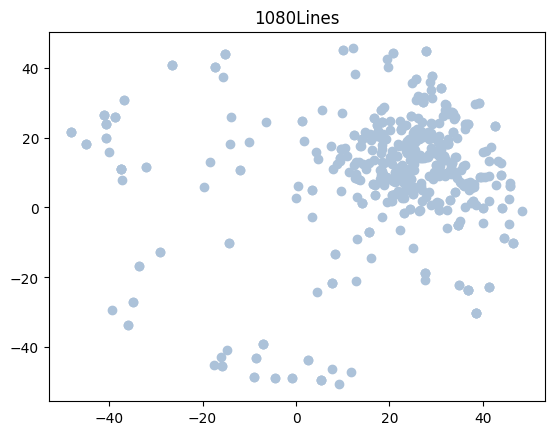

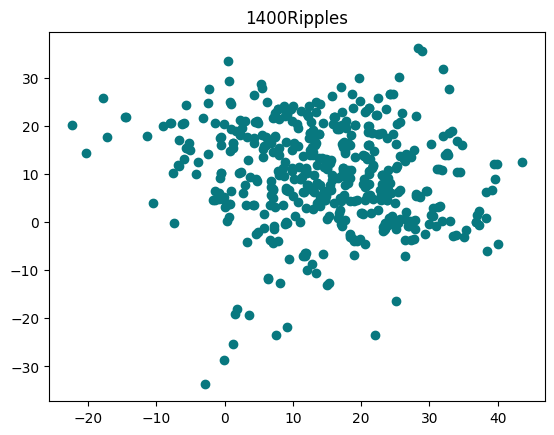

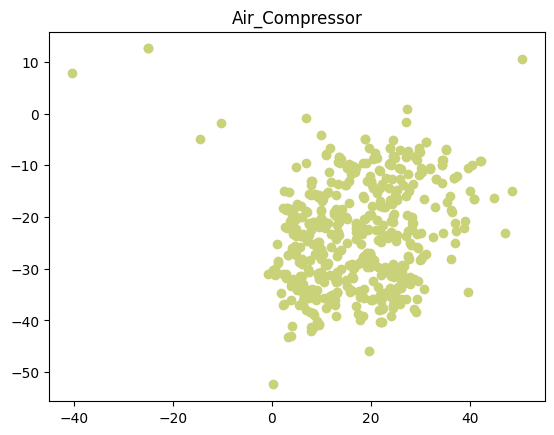

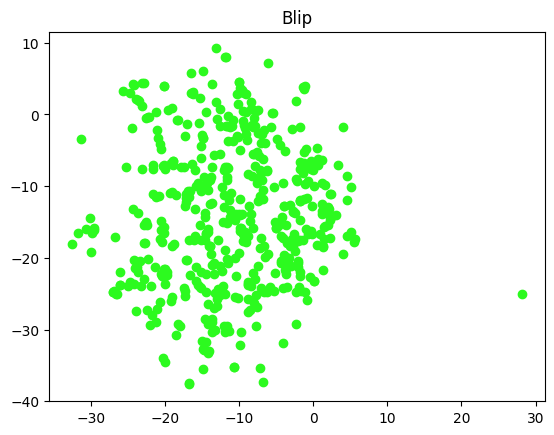

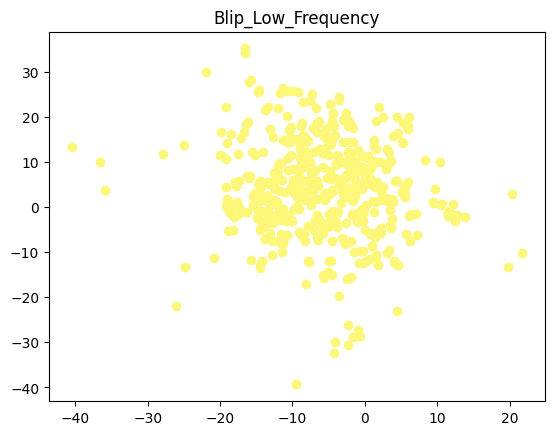

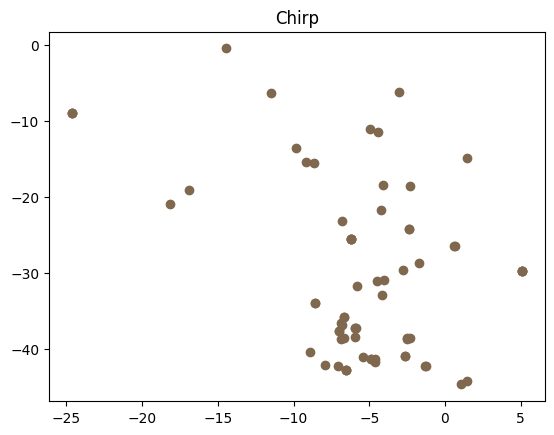

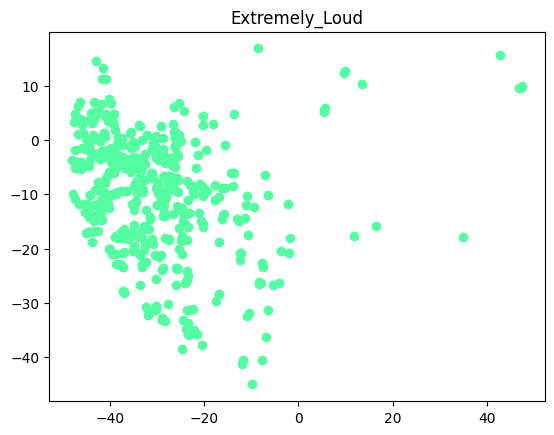

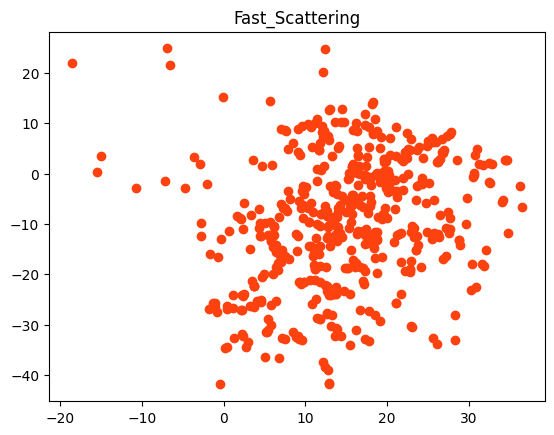

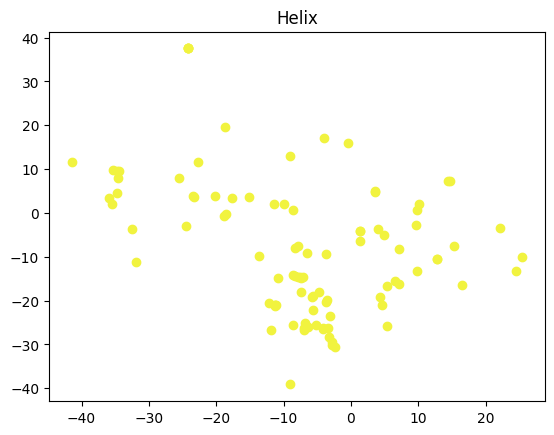

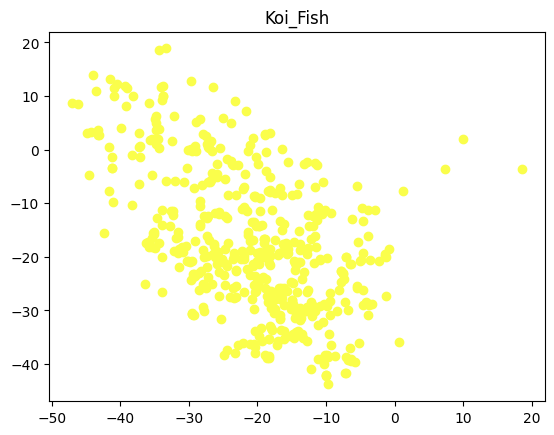

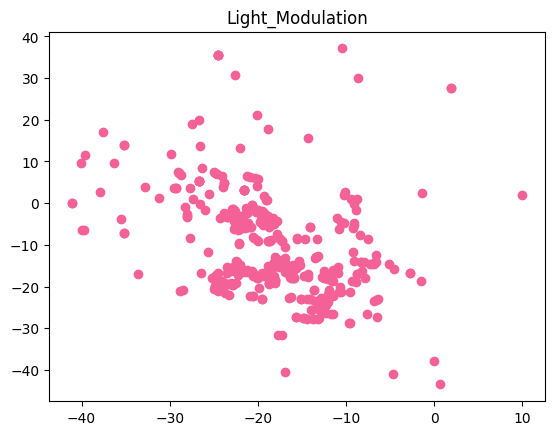

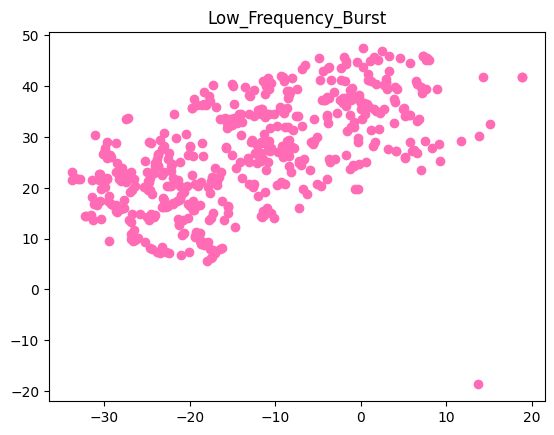

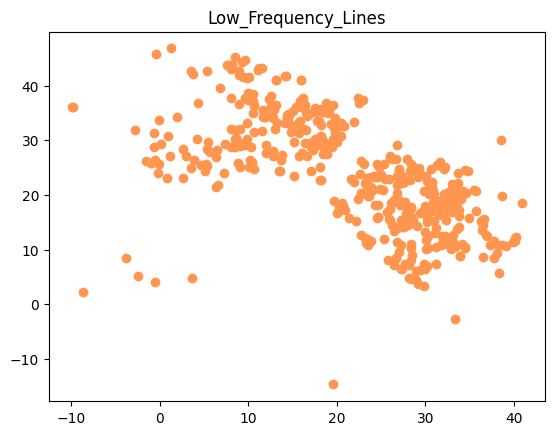

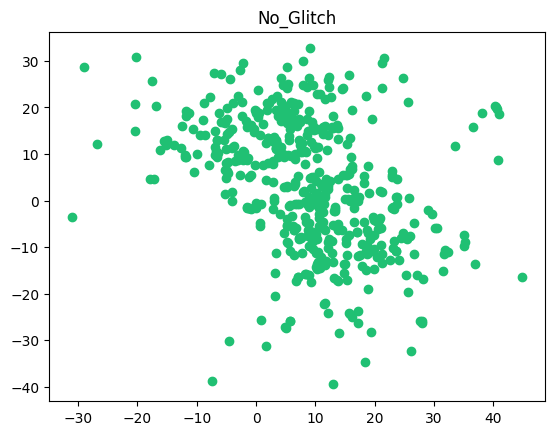

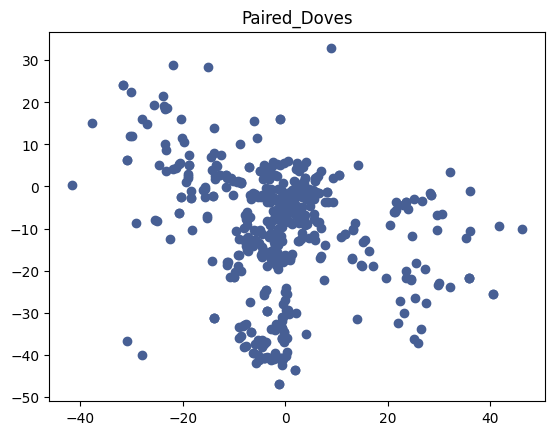

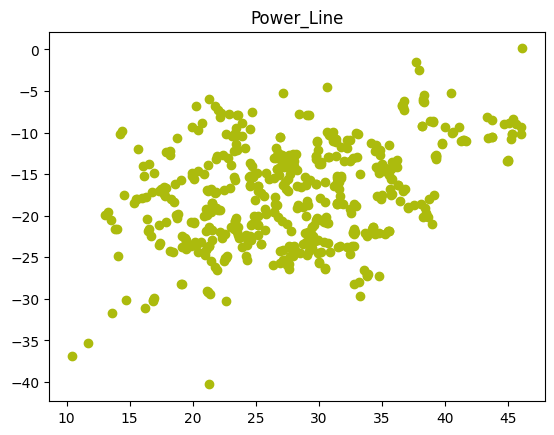

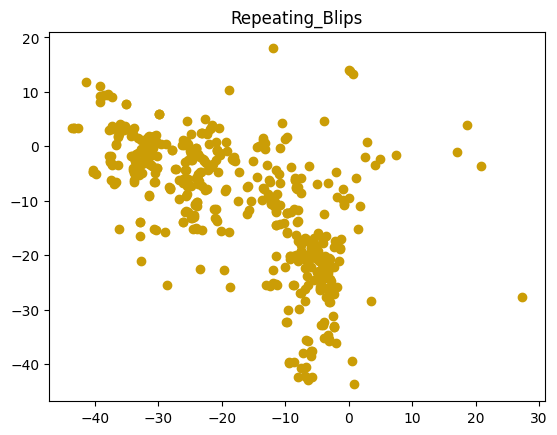

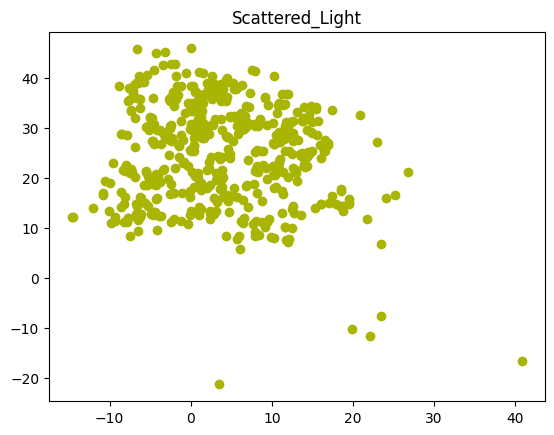

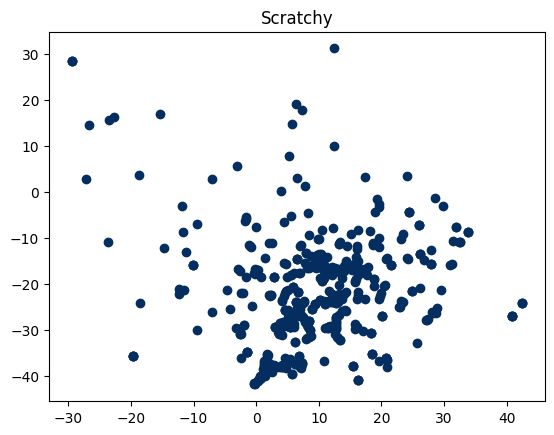

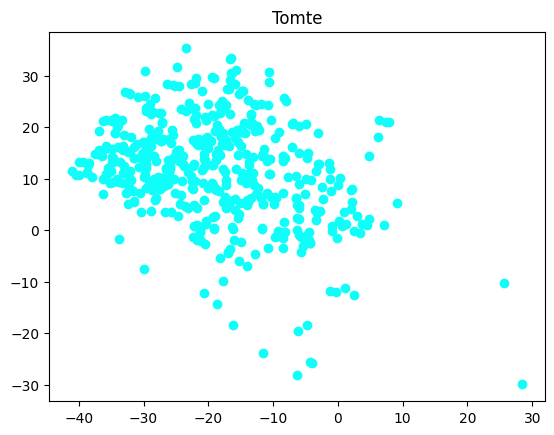

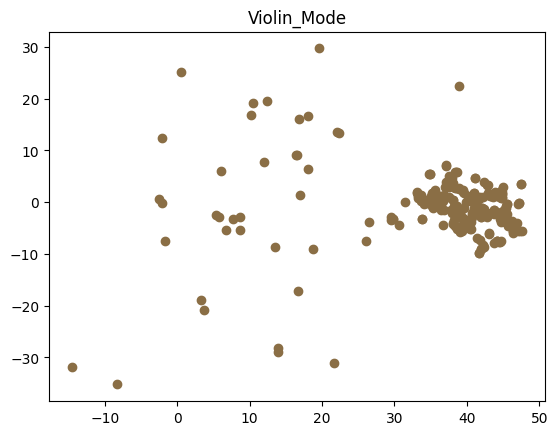

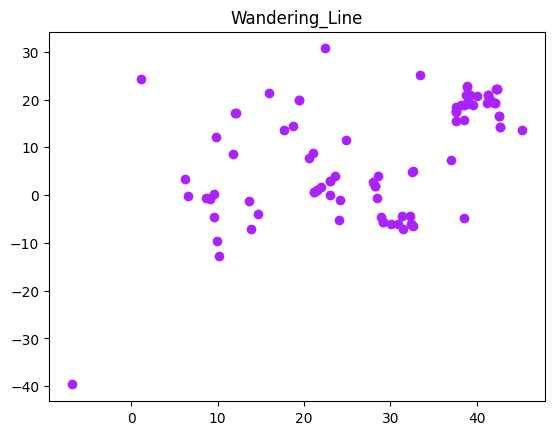

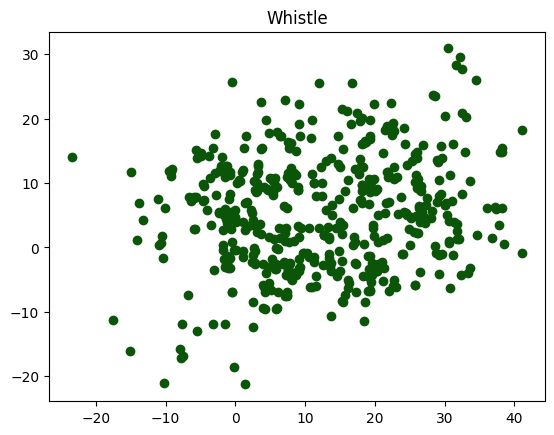

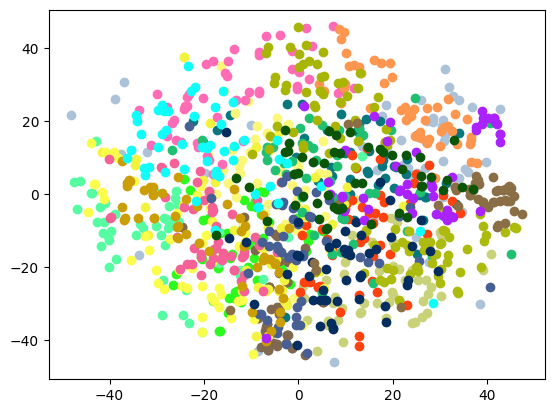

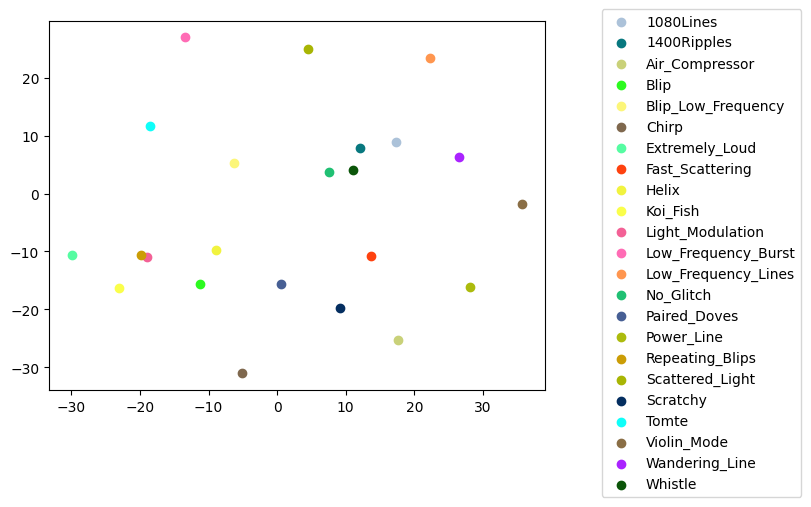

In [5]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]



for i in range(len(classes)):
    mask = (labels == i)
    x_show = x_embedded[mask, :][:500, :]
    plt.figure()
    plt.scatter(x_show[:, 0], x_show[:, 1], color=palette[3 * i])
    plt.title(classes[i])


plt.figure()
for i in range(len(classes)):
    mask = (labels == i)
    x_show = x_embedded[mask, :][:50, :]
    
    plt.scatter(x_show[:, 0], x_show[:, 1], color=palette[3 * i])

plt.figure()
for i in range(len(classes)):
    mask = (labels == i)
    x_show = x_embedded[mask, :][:50, :].mean(0, keepdims=True)
    
    plt.scatter(x_show[:, 0], x_show[:, 1], color=palette[3 * i], label=classes[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))



In [6]:
x_embedded = TSNE(n_components=3, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(data)




In [16]:
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.graph_objs import *

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()







for i in range(len(classes)):
    mask = (labels == i)
    x_show = x_embedded[mask, :][:500, :]
    # Configure the trace.
    trace = go.Scatter3d(
        x=x_show[:, 0],  
        y=x_show[:, 1], 
        z=x_show[:, 2], 
        mode='markers',
        marker={
            'size': 10,
            'opacity': 0.8,
        },
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
        scene=Scene(
                xaxis=XAxis(title=classes[i]),
                yaxis=YAxis(title=classes[i]),
                zaxis=ZAxis(title=classes[i])
            )
    )

    data = [trace]

    plot_figure = go.Figure(data=data, layout=layout)

    # Render the plot.
    plotly.offline.iplot(plot_figure)





/home/otn7723/miniconda3/envs/huggin_face/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/home/otn7723/miniconda3/envs/huggin_face/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:572: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/otn7723/miniconda3/envs/huggin_face/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:598: DeprecationWarning:

plotly.graph_objs.ZAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.scene.ZAxis


/home/otn7723/miniconda3/envs/huggin_face/lib/python3.8/site-packages/plotly/graph_objs/_deprecatio

In [21]:
data = []
for i in range(len(classes)):
    mask = (labels == i)
    x_show = x_embedded[mask, :][:100, :]
    cluster = kmeans.labels_[mask]
    # mask = cluster == 14
    # x_show = x_show[mask]
    # Configure the trace.
    trace = go.Scatter3d(
        x=x_show[:, 0],  
        y=x_show[:, 1], 
        z=x_show[:, 2], 
        mode='markers',
        marker={
            'size': 10,
            'opacity': 0.8,
        },
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
        scene=Scene(
                xaxis=XAxis(title=classes[i]),
                yaxis=YAxis(title=classes[i]),
                zaxis=ZAxis(title=classes[i])
            )
    )

    data.append(trace)

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

